In [26]:
# FOR MASK RCNN / COCO -----------------------------------------
# run this - needed for the Coco Dataset 
# pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI
# repo for it: https://github.com/philferriere/cocoapi
 
# http://cocodataset.org/#download
# from above, download 2017 Train/Val annotations
# 2017 Val images
# put it in a folder named 'data' or edit dataset cell (last one w/code) 

import torch
from torchvision import models, transforms
import torchvision
from torch.utils.data import DataLoader

from pycocotools.coco import COCO

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

# Gets the GPU if there is one
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# Mask R-CNN

In [2]:
# https://pytorch.org/docs/stable/torchvision/models.html#object-detection-instance-segmentation-and-person-keypoint-detection
network = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# fasterrcnn_resnet50_fpn instead??
network.eval();

In [3]:
coco_val = torchvision.datasets.CocoDetection("data/val2017", annFile="data/annotations/instances_val2017.json",
                                             transform=transforms.ToTensor())

labels = ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
len(labels)

loading annotations into memory...
Done (t=2.10s)
creating index...
index created!


In [4]:
# https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html
# haven't really looked at that much yet. might help a lot

In [116]:
# Look at sizes
for i in range(10):
    print(coco_val[i][0].shape)
coco_val[0][0] # 0th instance, 0 = image (1 = segmentation)

torch.Size([3, 426, 640])
torch.Size([3, 640, 586])
torch.Size([3, 483, 640])
torch.Size([3, 500, 375])
torch.Size([3, 640, 428])
torch.Size([3, 425, 640])
torch.Size([3, 640, 424])
torch.Size([3, 640, 621])
torch.Size([3, 427, 640])
torch.Size([3, 480, 640])


tensor([[[0.6667, 0.6784, 0.6863,  ..., 0.2706, 0.2667, 0.2745],
         [0.6745, 0.6902, 0.6941,  ..., 0.2706, 0.2824, 0.2784],
         [0.6863, 0.6941, 0.6980,  ..., 0.2745, 0.2706, 0.2784],
         ...,
         [0.7373, 0.7176, 0.7569,  ..., 0.7294, 0.7294, 0.7333],
         [0.7294, 0.7333, 0.7294,  ..., 0.7765, 0.7647, 0.7294],
         [0.7294, 0.7333, 0.7294,  ..., 0.5059, 0.4941, 0.4196]],

        [[0.5333, 0.5569, 0.5647,  ..., 0.2980, 0.2980, 0.2784],
         [0.5529, 0.5686, 0.5725,  ..., 0.3020, 0.3137, 0.2941],
         [0.5647, 0.5725, 0.5765,  ..., 0.3059, 0.3020, 0.2941],
         ...,
         [0.7412, 0.7176, 0.7333,  ..., 0.6157, 0.6157, 0.6118],
         [0.7176, 0.7216, 0.7176,  ..., 0.5255, 0.4706, 0.3451],
         [0.7176, 0.7216, 0.7176,  ..., 0.2353, 0.2235, 0.1608]],

        [[0.2863, 0.3020, 0.3098,  ..., 0.1647, 0.1529, 0.1451],
         [0.3020, 0.3137, 0.3176,  ..., 0.1569, 0.1686, 0.1569],
         [0.3098, 0.3176, 0.3137,  ..., 0.1529, 0.1569, 0.

In [111]:
j = 14 # which image

output = network(coco_val[j][0].unsqueeze(0))[0]
print(output.keys())
print("number of boxes/labels", len(output['labels']))
#output['boxes'][:5]

dict_keys(['boxes', 'labels', 'scores', 'masks'])
number of boxes/labels 18


# of Boxes:  18
Box #0 :  person
Box #1 :  surfboard
Box #5 :  surfboard
Box #6 :  surfboard
Box #7 :  boat
Box #9 :  boat
Box #10 :  boat


{'boat', 'person', 'surfboard'}

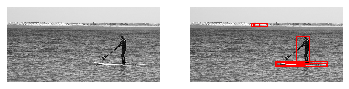

In [112]:
# plot image with boxes
image = coco_val[j][0]
image = image.numpy().transpose(1, 2, 0)

fig = plt.figure()

# just image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

# image & boxes
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.axis('off')
label_list = []
print('# of Boxes: ', len(output['boxes']))
for i in range(len(output['boxes'])): # go through each box
    width = output['boxes'][i][2] - output['boxes'][i][0]
    height = output['boxes'][i][3] - output['boxes'][i][1]
    if height < 10 or width < 10: continue
    # add a rectangle ((x,y), w, h)
    fig.get_axes()[1].add_patch(matplotlib.patches.Rectangle((output['boxes'][i][0], output['boxes'][i][1]), 
                                width, height, fill=False, color='r', linewidth=1))
    label_list.append(labels[output['labels'][i].item()])
    print('Box #'+ str(i), ": ", labels[output['labels'][i].item()]) # print label of box
    
set(label_list) # all different labels